# Tugas 5 : keyword extraction

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import re
import nltk
!pip install Sastrawi
nltk.download('punkt')
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize

import networkx as nx
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/ppw/report/tugas-ppw/hasil_prepros.csv")
df.head()

,judul,tanggal,isi,kategori,cleansing,case_folding,tokenize,stopword_removal
0,Awal Mula J&J Digugat Rp 233 Miliar Buntut Kas...,"Rabu, 16 Okt 2024 15:03 WIB",Jakarta - Seorang pria bernama Evan Plotkin di...,Kesehatan,Jakarta Seorang pria bernama Evan Plotkin di ...,jakarta seorang pria bernama evan plotkin di ...,"['jakarta', 'seorang', 'pria', 'bernama', 'eva...",jakarta pria bernama evan plotkin connecticut ...
1,XLIFE Hadirkan Jasa Terapis Pijat Profesional ...,"Rabu, 16 Okt 2024 14:32 WIB",Jakarta - Manfaat dari terapi pijat selain rel...,Kesehatan,Jakarta Manfaat dari terapi pijat selain rela...,jakarta manfaat dari terapi pijat selain rela...,"['jakarta', 'manfaat', 'dari', 'terapi', 'pija...",jakarta manfaat terapi pijat relaksasi menghil...
2,"Eks PM Malaysia Mahathir Mohamad Masuk RS, Sak...","Rabu, 16 Okt 2024 14:31 WIB",Jakarta - Mantan Perdana Menteri Malaysia Tun ...,Kesehatan,Jakarta Mantan Perdana Menteri Malaysia Tun D...,jakarta mantan perdana menteri malaysia tun d...,"['jakarta', 'mantan', 'perdana', 'menteri', 'm...",jakarta mantan perdana menteri malaysia tun dr...
3,Aksi Nyeleneh Ritual Miliarder AS Ganti Plasma...,"Rabu, 16 Okt 2024 14:01 WIB","Jakarta - Miliarder Amerika Serikat, Bryan Joh...",Kesehatan,Jakarta Miliarder Amerika Serikat Bryan Johns...,jakarta miliarder amerika serikat bryan johns...,"['jakarta', 'miliarder', 'amerika', 'serikat',...",jakarta miliarder amerika serikat bryan johnso...
4,"Uji Klinis di RI Makin Turun Tiap Tahun, Kalah...","Rabu, 16 Okt 2024 13:30 WIB",Jakarta - Dirjen Kefarmasian dan Alat Kesehata...,Kesehatan,Jakarta Dirjen Kefarmasian dan Alat Kesehatan...,jakarta dirjen kefarmasian dan alat kesehatan...,"['jakarta', 'dirjen', 'kefarmasian', 'dan', 'a...",jakarta dirjen kefarmasian alat kesehatan keme...


In [22]:
# Mengambil satu sample berita
sample_berita = df['case_folding'].iloc[4]

sample_berita_list = [sample_berita]
print(sample_berita_list)


['jakarta  dirjen kefarmasian dan alat kesehatan kemenkes lucia rizka andalusia menyebut jumlah uji klinis pengobatan maupun vaksinasi di indonesia malah semakin menurun setiap tahun tingginya insiden kasus beban penyakit kanker kardiovaskular masalah pernapasan dan mental tidak membuat indonesia berkontribusi besar pada riset global berbanding terbalik dengan laporan di negara lain kalau kita lihat vietnam meski beban kasusnya tidak setinggi indonesia tetapi dia memiliki uji klinis jauh lebih besar dari indonesia tutur rizka di kawasan jakarta pusat rabu  rendahnya riset di indonesia disebut rizka berkaitan dengan regulasi dan birokrasi yang berkelit sehingga menghambat proses uji klinis hal ini juga berpengaruh pada minimnya inovasi obat dalam negeri dan produksi bahan baku obat mandiri ketergantungan indonesia dengan bahan baku impor bahkan masih di angka  persen dalam kesempatan yang sama direktur jenderal pelayanan kesehatan azhar jaya ikut mengakui kekalahan indonesia dengan nega

In [23]:
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer tanpa batasan jumlah fitur
vectorizer = TfidfVectorizer()

# Fit dan transform teks ke dalam TF-IDF
tfidf_matrix = vectorizer.fit_transform(sample_berita_list)

# Konversi TF-IDF matrix ke DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df.head()

,ada,afrika,akibatnya,alat,andalusia,angka,apa,atas,azhar,bahan,...,tetangga,tetapi,thailand,tidak,tingginya,tutur,uji,vaksinasi,vietnam,yang
0,0.030671,0.030671,0.030671,0.030671,0.030671,0.030671,0.061343,0.030671,0.061343,0.061343,...,0.092014,0.030671,0.061343,0.061343,0.030671,0.030671,0.2147,0.030671,0.030671,0.122686


In [24]:
cosine_sim = cosine_similarity(tfidf_matrix.T)

# Mengonversi hasil cosine similarity menjadi DataFrame
feature_names = vectorizer.get_feature_names_out()
df_cosine_sim = pd.DataFrame(cosine_sim, index=feature_names, columns=feature_names)

# Menampilkan hasil cosine similarity antar kata
df_cosine_sim

,ada,afrika,akibatnya,alat,andalusia,angka,apa,atas,azhar,bahan,...,tetangga,tetapi,thailand,tidak,tingginya,tutur,uji,vaksinasi,vietnam,yang
ada,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
afrika,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
akibatnya,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
alat,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
andalusia,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tutur,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
uji,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
vaksinasi,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
vietnam,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [8]:
# Ubah nilai TF-IDF di bawah 0.5 menjadi 0, dan di atas atau sama dengan 0.5 menjadi 1
df_tfidf_1berita = tfidf_df.apply(lambda col: col.map(lambda x: 1 if x >= 0.05 else 0))

# Menampilkan DataFrame dengan nilai biner
df_tfidf_1berita

,afrika,akibatnya,alat,andalusia,angka,azhar,bahan,baku,beban,berbanding,...,susah,tbc,terbalik,terbesar,tetangga,thailand,tingginya,uji,vaksinasi,vietnam
0,0,0,0,0,0,1,1,1,1,0,...,0,0,0,0,1,1,0,1,0,0


In [9]:
# Membuat graf berdasarkan co-occurrence fitur
G = nx.Graph()

# Menambahkan node ke graf
for feature in df_tfidf_1berita.columns:
    G.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence
for i in range(len(df_tfidf_1berita)):
    features = df_tfidf_1berita.iloc[i]
    active_features = features[features == 1].index.tolist()

    for j in range(len(active_features)):
        for k in range(j + 1, len(active_features)):
            G.add_edge(active_features[j], active_features[k])

# Hitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Konversi hasil degree centrality ke DataFrame
df_degree_centrality = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])

# Mengurutkan DataFrame dari yang terbesar sampai terkecil
df_degree_centrality_sorted = df_degree_centrality.sort_values(by='Degree Centrality', ascending=False)

# Tampilkan hasil degree centrality yang sudah diurutkan
print(df_degree_centrality_sorted)

               Node  Degree Centrality
51         malaysia            0.22549
88            rizka            0.22549
64           negara            0.22549
47           klinis            0.22549
67             obat            0.22549
..              ...                ...
37   kardiovaskular            0.00000
36           kanker            0.00000
33         jenderal            0.00000
32             jaya            0.00000
102         vietnam            0.00000

[103 rows x 2 columns]


In [10]:
# Ambil top 10 fitur dengan degree centrality tertinggi
top_10_features = df_degree_centrality_sorted.head(10)['Node'].tolist()

# DataFrame yang difilter berdasarkan top 10 fitur
filtered_df_train_tfidf = df_tfidf_1berita.copy()

# Tampilkan pesan tentang top 10 fitur yang terpilih
print("\nTop 10 fitur berdasarkan degree centrality:")
print(top_10_features)

# Tampilkan DataFrame asli yang masih memiliki semua fitur
print("\nDataFrame asli dengan semua fitur (tanpa menghapus):")
print(filtered_df_train_tfidf)



Top 10 fitur berdasarkan degree centrality:
['malaysia', 'rizka', 'negara', 'klinis', 'obat', 'kesehatan', 'penyakit', 'perbandingan', 'persen', 'juta']

DataFrame asli dengan semua fitur (tanpa menghapus):
   afrika  akibatnya  alat  andalusia  angka  azhar  bahan  baku  beban  \
0       0          0     0          0      0      1      1     1      1   

   berbanding  ...  susah  tbc  terbalik  terbesar  tetangga  thailand  \
0           0  ...      0    0         0         0         1         1   

   tingginya  uji  vaksinasi  vietnam  
0          0    1          0        0  

[1 rows x 103 columns]


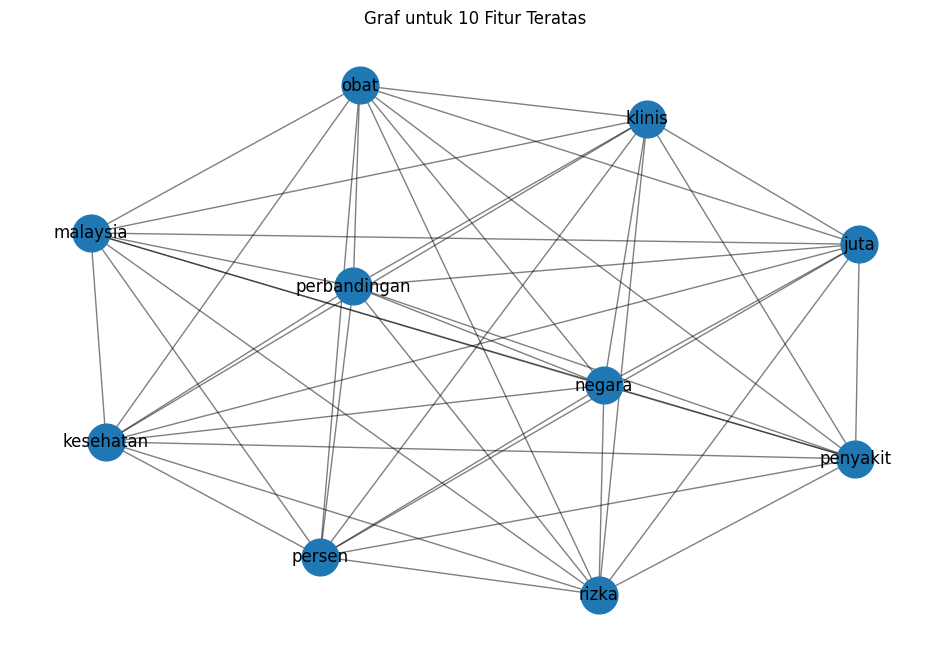

In [11]:
import matplotlib.pyplot as plt
import networkx as nx

# Membuat graf baru hanya untuk fitur teratas
G_top_10 = nx.Graph()

# Menambahkan node teratas ke graf
for feature in top_10_features:
    G_top_10.add_node(feature)

# Pastikan df_tfidf_1berita adalah nama yang benar dari dataframe yang mengandung data biner (TF-IDF)
if 'df_tfidf_1berita' in locals():
    # Menambahkan edge berdasarkan co-occurrence dari fitur teratas
    for i in range(len(df_tfidf_1berita)):
        features = df_tfidf_1berita.iloc[i]
        active_features = features[features == 1].index.tolist()
        active_top_10_features = [f for f in active_features if f in top_10_features]

        for j in range(len(active_top_10_features)):
            for k in range(j + 1, len(active_top_10_features)):
                G_top_10.add_edge(active_top_10_features[j], active_top_10_features[k])

    # Mengatur ukuran figure untuk visualisasi graf
    plt.figure(figsize=(12, 8))

    # Menggambar graf fitur teratas
    pos = nx.spring_layout(G_top_10)
    nx.draw_networkx_nodes(G_top_10, pos, node_size=700)
    nx.draw_networkx_edges(G_top_10, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_labels(G_top_10, pos, font_size=12, font_family='sans-serif')

    # Menampilkan graf
    plt.title('Graf untuk 10 Fitur Teratas')
    plt.axis('off')  # Menyembunyikan sumbu
    plt.show()
else:
    print("DataFrame 'df_tfidf_1berita' tidak ditemukan. Pastikan proses TF-IDF sudah dilakukan.")


In [12]:
# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G_top_10)

# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_top_10)

# Konversi hasil centrality ke DataFrame untuk lebih mudah dilihat
df_closeness_centrality = pd.DataFrame(closeness_centrality.items(), columns=['Node', 'Closeness Centrality'])
df_betweenness_centrality = pd.DataFrame(betweenness_centrality.items(), columns=['Node', 'Betweenness Centrality'])

# Menggabungkan semua centrality ke dalam satu DataFrame
df_centrality = pd.merge(df_degree_centrality_sorted, df_closeness_centrality, on='Node')
df_centrality = pd.merge(df_centrality, df_betweenness_centrality, on='Node')

# Menampilkan hasil centrality
print(df_centrality)

           Node  Degree Centrality  Closeness Centrality  \
0      malaysia            0.22549                   1.0   
1         rizka            0.22549                   1.0   
2        negara            0.22549                   1.0   
3        klinis            0.22549                   1.0   
4          obat            0.22549                   1.0   
5     kesehatan            0.22549                   1.0   
6      penyakit            0.22549                   1.0   
7  perbandingan            0.22549                   1.0   
8        persen            0.22549                   1.0   
9          juta            0.22549                   1.0   

   Betweenness Centrality  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  
5                     0.0  
6                     0.0  
7                     0.0  
8                     0.0  
9                     0.0  


In [ ]:
# Mengambil kata kunci dengan nilai TF-IDF tertinggi untuk setiap dokumen
kata_kunci = df_tfidf_1berita.idxmax(axis=1)
print("\nKata kunci dari setiap dokumen:")
for i, kata in enumerate(kata_kunci):
    print(f"Dokumen {i+1}: {kata}")